# House Prices Study (In Python)

# Introduction: 
Here, we look at the dataset provided by Kaggle on house prices and house price predictors and follow the following main steps:

- Descriptive Statistics
- Feature Engineering
- Make Predictions

# 1.1: Load Modules/Packages

In [1]:
import pandas as pd
#from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os #for loading path

# initial variable analysis tools
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.decomposition import PCA
from patsy import dmatrices
import itertools

# data cleaning tools
from sklearn.preprocessing import StandardScaler, LabelEncoder, Imputer

# model evaluation tools
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_squared_error
from statsmodels.tools.eval_measures import mse

# machine learning modules
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, IsolationForest
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR


# 1.2 Load and look at data

In [2]:
house_train = pd.read_csv("//home/rxu17/Documents/house_train.csv")
house_test = pd.read_csv("//home/rxu17/Documents/house_test.csv")

# rename some columns to use for dmatrices
house_train = house_train.rename(columns = {'1stFlrSF': 'FirstFlrSF', '2ndFlrSF':'SecFlrSF', '3SsnPorch':'ThreeSsnPorch'}) 
house_test = house_test.rename(columns = {'1stFlrSF': 'FirstFlrSF', '2ndFlrSF':'SecFlrSF', '3SsnPorch':'ThreeSsnPorch'})

In [3]:
house_train.head() # peeking at data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Looks like our training set has some NaN values we'll need to fix later

In [4]:
house_train.describe() # some descriptive statistics

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
house_train.info() # getting a sense of object types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# 1.3 Data Visualization
Now we will visualize the data with boxplots, histograms and scatterplots when applicable

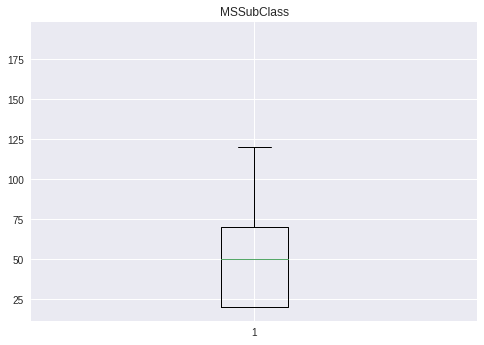

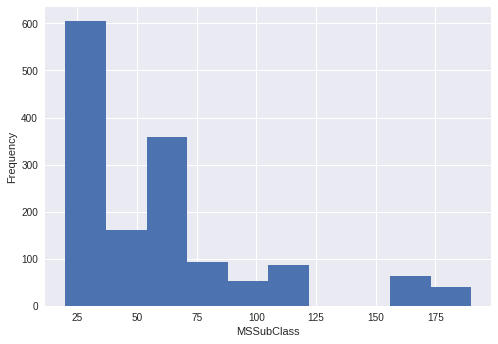

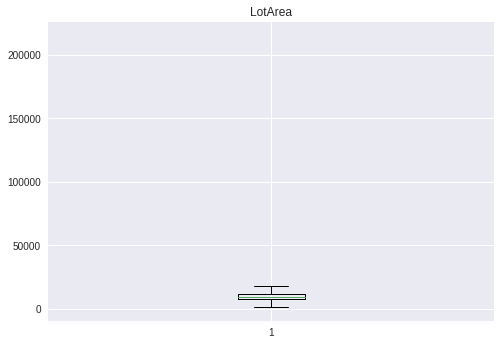

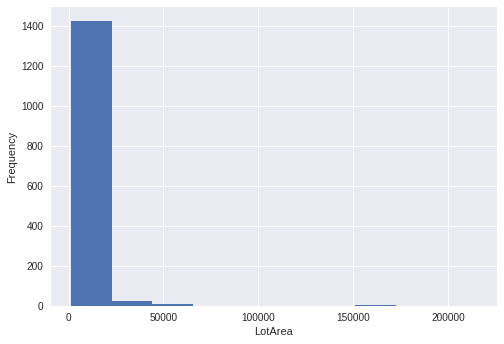

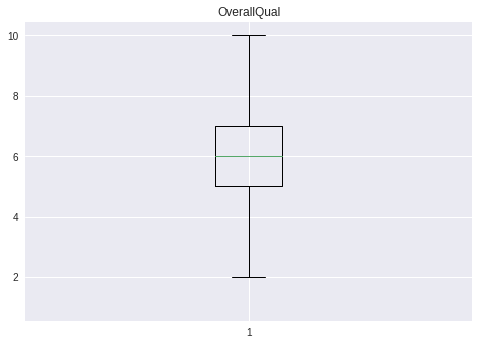

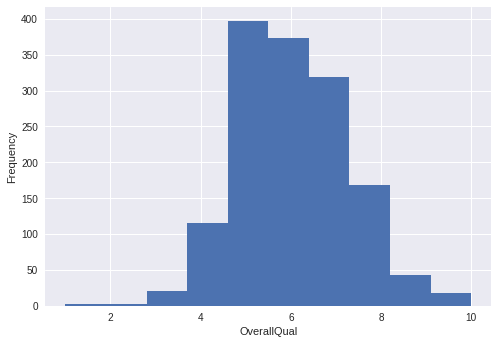

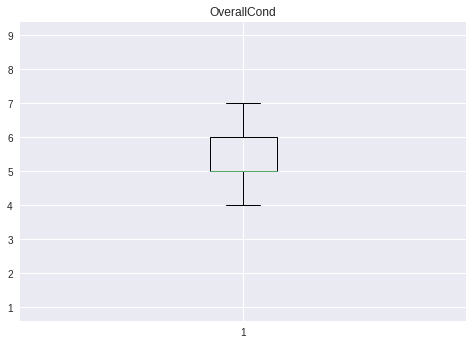

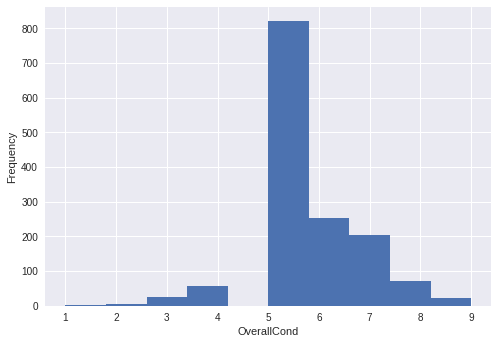

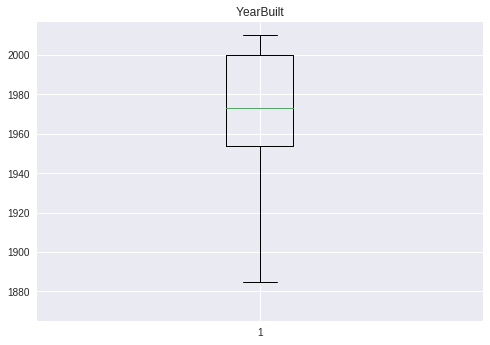

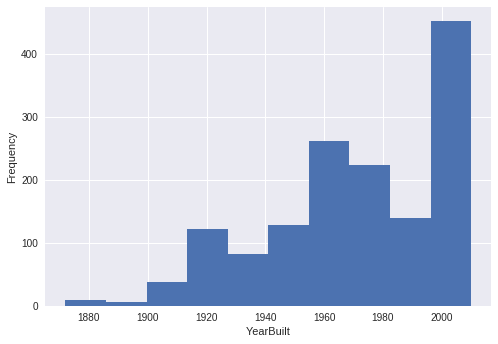

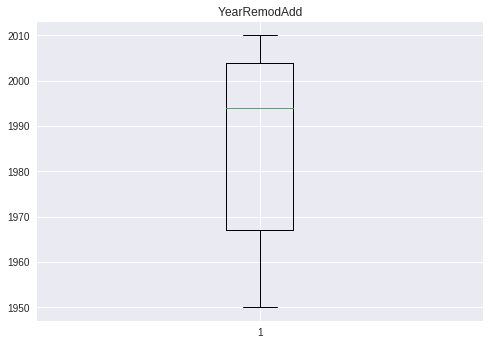

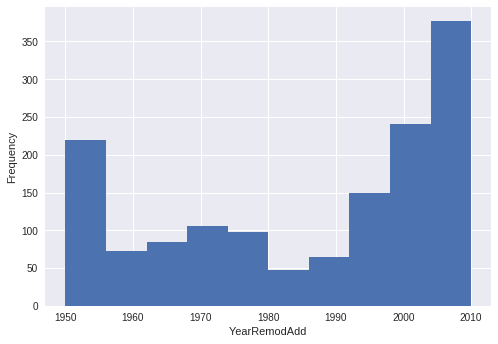

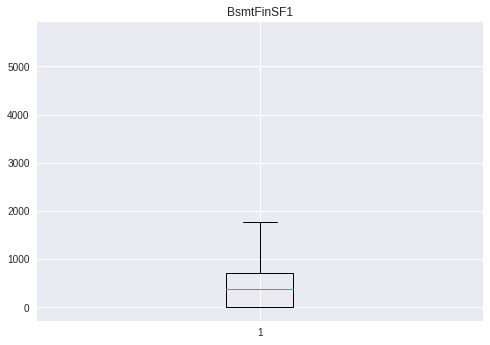

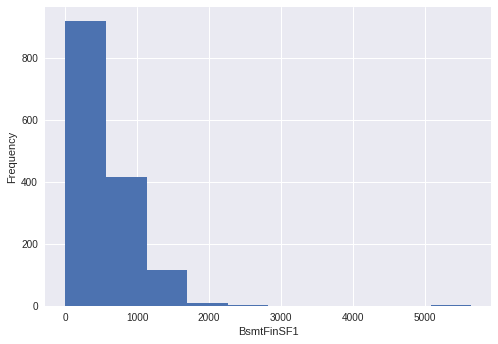

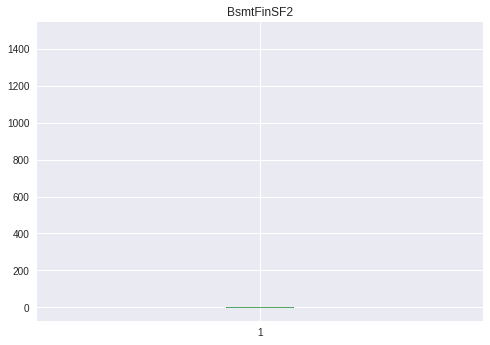

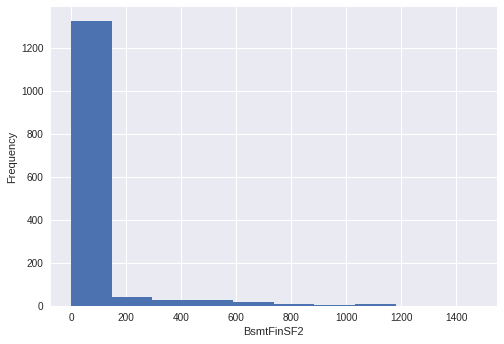

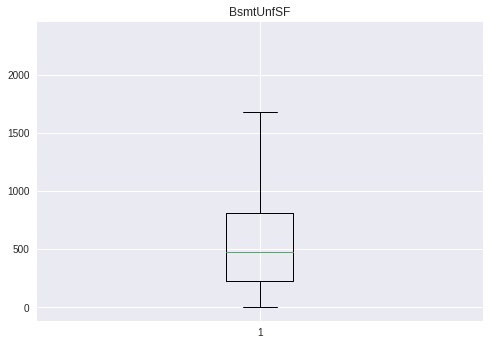

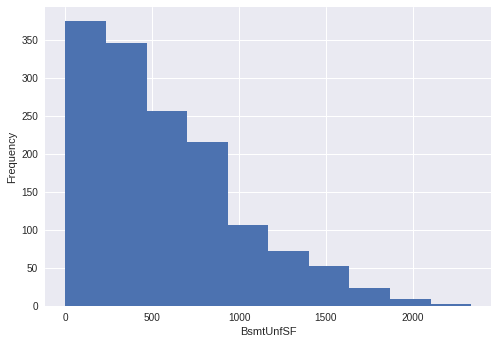

In [6]:
# plots the boxplot and histogram of integer valued variables only
for v in house_train.select_dtypes(include = ['int64']).columns.values[1:10]:
    plt.boxplot(house_train[v])
    plt.title(v)
    plt.show()
    plt.hist(house_train[v])
    plt.xlabel(v)
    plt.ylabel("Frequency")
    plt.show()

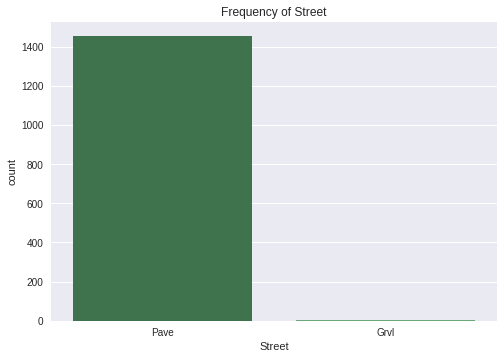

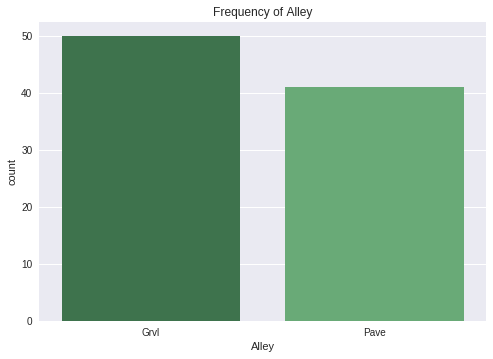

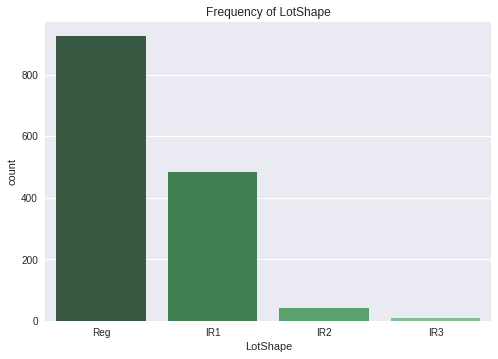

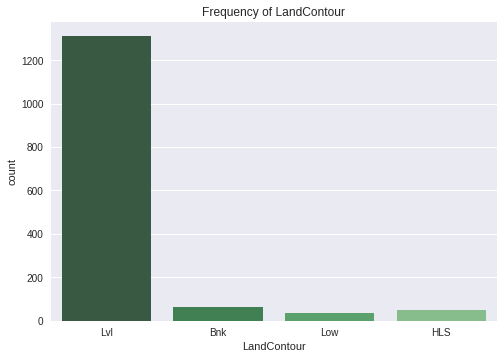

In [7]:
# grabbing the boxplots of the categorical variables
for v in house_train.select_dtypes(include = ['object']).columns.values[1:5]:
    sns.countplot(x=v, data=house_train, palette="Greens_d")
    plt.title("Frequency of " + v)
    plt.show()

In [8]:
# plotting the scatterplot of the float variables
#for v in house_train.select_dtypes(include = ['float64']).columns.values[1:(house_train.shape[0]-1)]:
sns.pairplot(house_train.select_dtypes(include = ['float64'])) 
plt.show()

ValueError: max must be larger than min in range parameter.

As a result of the above, we have a bunch of categorical variables that we need to change to numeric form if we are to perform regression. We also have some variables with only years that we will change from year to number of years till our current year: 2017. 

# 1.3 Summary Statistics
Now we look at stats such as R-Squared, P-value of the non categorical variables. 

In [9]:
# some feature engineering: Changing years: Year Built changed to how many years since current year, Year Remodeled changed to how many years since current year
current_yr = 2017
house_train['YearBuilt'] = abs(house_train['YearBuilt'] - current_yr)
house_train['YearRemodAdd'] = abs(house_train['YearRemodAdd'] - current_yr)

def singleVarModelStat(dataset, variables, dep_var):
    single_var_stat = pd.DataFrame(columns = ['Variable', 'R_Squared', 'P_value', 'F_stat', 'Correlation'])
    i = 0
    for v in variables:
        formula = dep_var + "~" + v
        model = ols(formula, data = dataset).fit()
        single_var_stat.loc[i] = [v, model.rsquared, model.f_pvalue, model.fvalue, np.corrcoef(dataset[dep_var], dataset[v])[0,1]]
        i += 1
    return single_var_stat

single_var_stat = singleVarModelStat(house_train, house_train.select_dtypes(include = ['int64', 'float64']).columns.values[1:35], 'SalePrice')
single_var_stat.head(10)

,Variable,R_Squared,P_value,F_stat,Correlation
0,MSSubClass,0.007104,1.266472e-03,10.431466,-0.084284
1,LotFrontage,0.123763,2.602442e-36,169.350639,NaN
2,LotArea,0.069613,1.123139e-24,109.090355,0.263843
3,OverallQual,0.625652,2.185675e-313,2436.770591,0.790982
4,OverallCond,0.006062,2.912351e-03,8.891623,-0.077856
5,YearBuilt,0.273422,2.990229e-103,548.665821,-0.522897
6,YearRemodAdd,0.257151,3.164948e-96,504.714855,-0.507101
7,MasVnrArea,0.228000,1.458509e-83,428.237393,NaN
8,BsmtFinSF1,0.149320,3.394110e-53,255.923517,0.386420
9,BsmtFinSF2,0.000129,6.639987e-01,0.188780,-0.011378


# 2.1 Replacing Missing Values
There are many ways to replace missing values - mean, mode, or using machine learning tools to predict the missing values:
For simplicity:
- using mode for categorical missing values
- using mean for continous missing 

In [10]:
# This method checks for missing in dataset, removes them and replaces with the mean of that particular predictor var
#  if its an numeric value other wise it replaces the missing value with the most common value 
#
def fillMissingValues(dataset, typeItem):
        dataset_obj = dataset.select_dtypes(include = [typeItem]).copy()
        dataset_null = dataset_obj.isnull().any()[dataset_obj.isnull().any() == True]
        for v in dataset_null.index.values:
            if typeItem == 'int64' or typeItem == 'float64':
                mean_val = np.mean(dataset[v])
                if typeItem == 'int64':
                    mean_val = int(mean_val)
                dataset_obj = dataset_obj.fillna({v: mean_val}) 
            elif typeItem == 'object':
                cur_var = dataset_obj[v].value_counts()
                max_value = cur_var[cur_var.index.values[0]]
                pop_value = cur_var.index.values[0]
                for i in cur_var.index.values: # check for most frequent value
                    max_value = cur_var[i]
                    if cur_var[i] > max_value:
                        max_value = cur_var[i]
                        pop_value = i 
                dataset_obj = dataset_obj.fillna({v: pop_value}) 
        return dataset_obj

# This function replaces the updated columns of the previous processes in the original dataset
def replaceOldDataset(old_dataset, new_columns):
    for col in new_columns.columns.values:
        if(old_dataset[col].dtype == 'float64' or old_dataset[col].dtype == 'int64'):
            old_dataset[col] = new_columns[col]
        else:
            old_dataset[col] = new_columns[col]
    return old_dataset

#since for my dataset, we have missing values for every type
house_train_miss1 = fillMissingValues(house_train, 'int64')
house_train_miss2 = fillMissingValues(house_train, 'float64')
house_train_miss3 = fillMissingValues(house_train, 'object')

house_train = replaceOldDataset(house_train, house_train_miss1)
house_train = replaceOldDataset(house_train, house_train_miss2)
house_train = replaceOldDataset(house_train, house_train_miss3)

house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


# 2.2 Encoding Categorical Values

In [11]:
# This changes categorical values (objects) to type int (creates an Encoder object)
def encodingCategorical(dataset):
    le = LabelEncoder()
    for var in dataset.columns.values:
        le.fit(dataset[var])
        dataset[var] = le.transform(dataset[var])
    return dataset

house_train_miss3 = fillMissingValues(house_train, 'object')
house_train_miss3 = encodingCategorical(house_train_miss3)
house_train = replaceOldDataset(house_train, house_train_miss3)

house_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000


# 2.3 Multicollinearity 
Another main issue in regression is the deal with multicollinearity which will increase standard errors. We will locate the variables with high multicollinearity by using variance inflation factors (VIFs)and remove the variables that have low correlation with Sale Price

In [12]:
# setting base variables and dependent variables (so we don't have to keep writing them out)
variables = house_train.columns.values[1:(len(house_train.columns.values)-1)]
dep_var = house_train.columns.values[len(house_train.columns.values)-1]
total_variables = house_train.columns.values[1:len(house_train.columns.values)]

In [13]:
# used to find the VIF of each variable when all variables are inserted into the model
def VIF(dataset, variables, dep_var):
    features = '+'.join(dataset[variables].columns)
    y, X = dmatrices(dep_var + '~' + features, dataset, return_type ='dataframe')
    vif = pd.DataFrame()
    vif['variables'] = X.columns[1:] # exclude id col
    vif['VIF'] = [variance_inflation_factor(dataset[variables].values, i) for i in range(0, dataset[variables].shape[1])]
    return vif

vif_multi_var = VIF(house_train, variables, dep_var)
vif_multi_var.head()

/home/rxu17/anaconda2/lib/python2.7/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,MSSubClass,15.130476
1,MSZoning,36.462287
2,LotFrontage,19.947081
3,LotArea,3.451729
4,Street,280.817175


# 2.4 Eliminating Features
Here, we eliminate features based on VIF factors greater than 10 and correlations with Sale Price less than 60%

In [14]:
# removing features based on VIF and correlation with Sale Price
single_var_stat = singleVarModelStat(house_train, variables, dep_var)
i = 0
for v in variables:
    if(vif_multi_var.iloc[i]['VIF'] > 10 and abs(single_var_stat.iloc[i]['Correlation']) < 0.60):
        variables = list(variables)
        variables.remove(v)
        i += 1
    elif(single_var_stat.iloc[i]['Correlation'] < 0.05):
        variables = list(variables)
        variables.remove(v)
        i += 1
    else:
        i += 1
        continue
house_train_new = house_train[total_variables]

#pd.write_csv("house_train_new.csv")

Eliminating features using PCA (method 2)

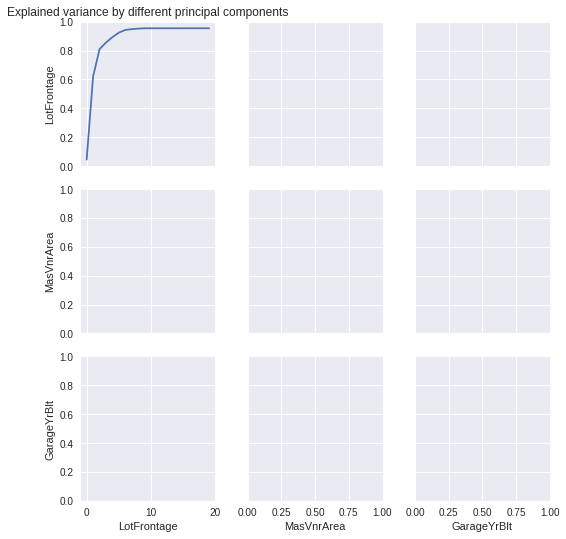

In [15]:
# gather the best components using PCA 
def PCA_analysis(dataset):
    pca = PCA(n_components = 20)
    X_train = pca.fit_transform(dataset[variables])
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title("Explained variance by different principal components")
    plt.xlabel("Principal Component")
    plt.ylabel("Fractional Explained Variance")
    plt.show()
    return X_train

X_train_pca = PCA_analysis(house_train_new)

# 3.1 Multivariate Linear Regression Prediction
To start off simple, we're going to use linear regression as our first model for predicting on the test set using the training data

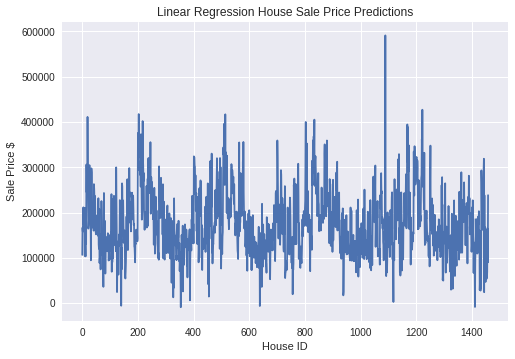

In [16]:
# splitting data into testing and training data
#dataset = house_price_new
#X_train, X_test, y_train, y_test = train_test_split(dataset[variables],dataset[dep_var], test_size = 0.5, random_state = 42)

# we have to fill missing values in the test set
house_test_miss1 = fillMissingValues(house_test, 'object')
house_test_miss2 = fillMissingValues(house_test, 'int64')
house_test_miss3 = fillMissingValues(house_test, 'float64')

# first we have to convert the test set to numeric data as well
house_test_miss1= encodingCategorical(house_test_miss1)
house_test_new = replaceOldDataset(house_test, house_test_miss1)
house_test_new = replaceOldDataset(house_test_new, house_test_miss2)
house_test_new = replaceOldDataset(house_test_new, house_test_miss3)

# setting up training and testing sets
y_train = house_train['SalePrice']
X_test = house_test_new[variables]
X_train = house_train_new[variables]

lr = LinearRegression() # creating our linear model
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

plt.plot(y_pred) # visualizing our predictions
plt.title("Linear Regression House Sale Price Predictions")
plt.ylabel('Sale Price $')
plt.xlabel("House ID")
plt.show()

#print(np.sqrt(mean_squared_error(y_pred, y_test)))

# 3.2 Random Forest Predictions

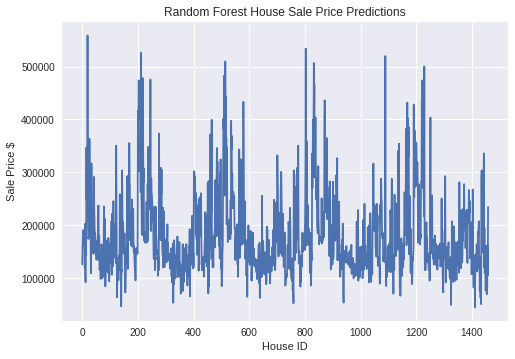

In [17]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

plt.plot(y_pred_rf)
plt.title("Random Forest House Sale Price Predictions")
plt.ylabel('Sale Price $')
plt.xlabel("House ID")
plt.show()

# 3.3 Model Selection 

In [18]:
# we've randomnly split the training set into the four corresponding sets of data
X_train, X_test, y_train, y_test = train_test_split(house_train_new[variables], house_train_new[dep_var], test_size = 0.4)
X_train.head()

,LotArea,LandSlope,Neighborhood,Condition1,HouseStyle,OverallQual,RoofStyle,RoofMatl,MasVnrArea,Foundation,...,GrLivArea,BsmtFullBath,HalfBath,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea
484,7758,0,19,2,2,5,1,1,0.0,1,...,999,1,0,0,1,264,0,132,0,0
145,2522,0,7,2,5,6,1,1,50.0,2,...,1709,0,0,0,2,380,0,40,0,0
428,6762,0,5,2,2,7,1,1,108.0,2,...,1208,1,0,0,2,628,105,54,0,0
280,11287,0,20,2,5,7,1,1,340.0,1,...,1982,0,1,1,2,575,0,84,0,0
1198,9100,0,5,2,2,7,1,1,0.0,2,...,1212,0,0,0,2,573,356,0,0,0


In [19]:
# Our many models

models = [["AdaBoost", AdaBoostRegressor()], ["KNN", KNeighborsRegressor()], ["SVR", SVR()], ["GaussianNB", GaussianNB()], ["NeuralNet", MLPRegressor()], ['RandomForest', RandomForestRegressor()], ['LinearRegression', LinearRegression()]]

model_results = pd.DataFrame(columns=["Model", "RMSE"])
index = 0
for i, j in models:
    j.fit(X_train, y_train)
    y_hat = j.predict(X_test)
    mse = mean_squared_error(y_test, y_hat)
    model_results.loc[index] = [i, np.sqrt(mse)]
    index += 1

/home/rxu17/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [20]:
model_results

,Model,RMSE
0,AdaBoost,36816.597360
1,KNN,48933.180367
2,SVR,83321.981220
3,GaussianNB,55755.867461
4,NeuralNet,55320.721896
5,RandomForest,35199.663628
6,LinearRegression,45157.495225


We can conclude from the above that RandomForest and AdaBoost are the best performing, and with some parameter tuning, we can get the overall results to improve. 

# 3.4 Checking for Overfitting
We want to check for overfitting by seeing the RMSE values on the training set for each model. 

In [21]:
models = [["AdaBoost", AdaBoostRegressor()], ["KNN", KNeighborsRegressor()], ["SVR", SVR()], ["GaussianNB", GaussianNB()], ["NeuralNet", MLPRegressor()], ['RandomForest', RandomForestRegressor()], ['LinearRegression', LinearRegression()]]

model_results_train = pd.DataFrame(columns=["Model", "RMSE"])
index = 0
for i, j in models:
    j.fit(X_train, y_train)
    y_hat = j.predict(X_train)
    mse_train = mean_squared_error(y_train, y_hat)
    model_results_train.loc[index] = [i, np.sqrt(mse_train)]
    index += 1

In [22]:
model_results_train

,Model,RMSE
0,AdaBoost,26689.171070
1,KNN,38221.397516
2,SVR,80020.533187
3,GaussianNB,17700.229921
4,NeuralNet,47476.458267
5,RandomForest,13335.595078
6,LinearRegression,32285.922388


# 4.1 Parameter Tuning
Let's delve into parameter tuning for the various models. First up is Random Forest: 
[Image](https://databricks.com/wp-content/uploads/2015/01/Ensemble-example.png)

How Random Forest works: 

Parameters to tune:
        ◦ n_estimators – more trees, less likely to overfit
        ◦ max_features – (30%-50%) of features, and smaller means less overfitting(best range(2-6 features)
        ◦ max_depth – decrease means decreasing complexity of learned models (like a regularization term)
        ◦ min_samples_leaf – set greater than one

In [23]:
rf = RandomForestRegressor(n_estimators = 1000, max_features = int(len(variables)*0.5), max_depth = 5, bootstrap=False)
print(rf)
rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_hat, y_test)))

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=5,
           max_features=11, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
37170.4122027


# 4.2 One Hot Encoding
Now, we're going to take a different approach in encoding our values. We're going to take our categorical variables, and change the categorical variables to dummy variables based on the levels. 

For example, if a Variable was School Year, then we make variables for Sophmore, Junior and Senior then put a 1 if its true, 0 if false. 

Looking at our variables again, to simplify things, we're going to combine 1st floor and 2nd floor square feet. We're also going to ignore other square feet variables (usually in a house listing, the other square feed are not displayed). 

We also researched typical factors that determine a house's price:
- Demographics
- Size
- Condition
- 
**Specific Variables to Change:**
MonthSold will be converted to season: Summer, Spring, Fall, Winter
1stFloor + 2ndFloor => TotalSqFeet

In [24]:
# We're going to remove all variables except basic ones:
# House Age
# Garage 
# Garage Size (cars)
# Total Square Feet
# Total Bathrooms
# Lot Size
# Type of House
# Community
# Fireplace
# Street - Pave or Gravel
# Covering on House Exterior1st
# ExterCond and ExterQual
# Foundation
# BsmtCond
# Basement (yes or no)
# HeatingQC
# CentralAir
# BsmtFullBath + BsmtHalfBath + HalfBath + FullBath
# KitchenQual
# Kitchens
# Functional - categories: typical, deductions, bad deductions
# GarageQual
# GarageCond
# PavedDrive - yes or no
# Pool - yes or no
# Fence - yes or no
# MiscVal

house_train = pd.read_csv("//home/rxu17/Documents/house_train.csv")
#print(house_train.columns.values)

variables_to_keep = ['LotArea', 'Street', 'Neighborhood', 'OverallCond', 'YearBuilt'
                    , 'YearRemodAdd', 'RoofMatl', 'Exterior1st', 'ExterCond', 'Foundation', 'BsmtCond', 
                    'HeatingQC', 'CentralAir', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 
                     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'TotRmsAbvGrd', 
                     'Fireplaces', 'GarageCars', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
                     'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
house_train = house_train[variables_to_keep]

house_train = house_train.rename(columns = {'1stFlrSF': 'FirstFlrSF', '2ndFlrSF':'SecFlrSF'})

In [25]:
# changing month sold to seasons
house_train['Spr'] = 0

house_train.loc[(house_train['MoSold'] < 6) & (house_train['MoSold'] > 2),'Spr'] = 1

house_train['Sum'] = 0
house_train.loc[(house_train['MoSold'] < 9) & (house_train['MoSold'] > 5),'Sum'] = 1

house_train['Aut'] = 0
house_train.loc[(house_train['MoSold'] < 12) & (house_train['MoSold'] > 8),'Aut'] = 1

house_train['Win'] = 0
house_train.loc[(house_train['MoSold'] > 11) & (house_train['MoSold'] < 3),'Win'] = 1

house_train = house_train.drop('MoSold', axis = 1)

In [26]:
# removing other square feet 
# combining 1st, 2nd floor, basement sq feet

house_train['TotalSqFt'] = house_train['FirstFlrSF'] + house_train['SecFlrSF'] + house_train['TotalBsmtSF']

In [27]:
result = [word for word in house_train.columns.values if 'SF' in word]
house_train = house_train.drop(result, axis = 1)

In [28]:
# changing variables YrSold and HouseAge to how old was house when sold:
house_train['HouseAge'] = house_train['YrSold'] - house_train['YearBuilt']
house_train['YrRemodel'] = house_train['YearRemodAdd'] - house_train['YearBuilt']
house_train = house_train.drop(['YearBuilt', 'YrSold', 'YearRemodAdd'], axis = 1)

In [29]:
# combining bathrooms in basement with rest of house
house_train['TtlBath'] = house_train['BsmtFullBath'] + house_train['BsmtHalfBath'] + house_train['FullBath'] + house_train['HalfBath']
house_train = house_train.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis = 1)

In [30]:
# new column pool or no pool
house_train['Pool'] = 1
house_train.loc[house_train['PoolQC'].isnull(), 'Pool'] = 0

In [31]:
# new column fence or no fence
house_train['FenceYes'] = 1
house_train.loc[house_train['Fence'].isnull(), 'FenceYes'] = 0

house_train = house_train.drop(['Fence', 'PoolQC'], axis = 1)

In [32]:
# used to find the VIF of each variable when all variables are inserted into the model
def VIF(dataset, variables, dep_var):
    features = '+'.join(dataset[variables].columns)
    y, X = dmatrices(dep_var + '~' + features, dataset, return_type ='dataframe')
    vif = pd.DataFrame()
    vif['variables'] = X.columns[1:] # exclude id col
    vif['VIF'] = [variance_inflation_factor(dataset[variables].values, i) for i in range(0, dataset[variables].shape[1])]
    return vif

vif_multi_var = VIF(house_train_new, variables, dep_var)

#house_train_new = house_train_new.drop(['TotRmsAbvGrd', 'KitchenAbvGr'], axis = 1)

vif_multi_var

,variables,VIF
0,LotArea,3.040201
1,LandSlope,1.382035
2,Neighborhood,5.383055
3,Condition1,6.082163
4,HouseStyle,5.094480
5,OverallQual,38.410192
6,RoofStyle,4.346964
7,RoofMatl,4.499994
8,MasVnrArea,1.705279
9,Foundation,6.245054


In [33]:
# @method create_dummy_var changes all our categorical variables into dummy variables based on levels they have
# @param dataset our original house prices dataset
# @param variables that are our independent variables
# @return newdataset data frame with dummy variables in place of categorical variables
def create_dummy_var(dataset):
    new_set = dataset.select_dtypes(include = ['object']).copy()
    for var in new_set.columns.values:
        for label in new_set[var].value_counts().index.values:
            dataset[label] = 0
            dataset.loc[dataset[var] == label, label] == 1
        dataset = dataset.drop(var, axis = 1)
    return dataset

house_train_new = house_train
print(type(house_train_new))
house_train_new = create_dummy_var(house_train_new)

house_train_new.head()
#house_train_new.select_dtypes(include = ['object']).copy()

<class 'pandas.core.frame.DataFrame'>


,LotArea,OverallCond,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MiscVal,SalePrice,Spr,...,Y,N,Typ,Min2,Min1,Mod,Maj1,Maj2,Sev,P
0,8450,5,3,1,8,0,2,0,208500,0,...,0,0,0,0,0,0,0,0,0,0
1,9600,8,3,1,6,1,2,0,181500,1,...,0,0,0,0,0,0,0,0,0,0
2,11250,5,3,1,6,1,2,0,223500,0,...,0,0,0,0,0,0,0,0,0,0
3,9550,5,3,1,7,1,3,0,140000,0,...,0,0,0,0,0,0,0,0,0,0
4,14260,5,4,1,9,1,3,0,250000,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# encoding variable Paved Drive and Central Air from T or F to 1 or 0
house_train.loc[house_train['PavedDrive'] == 'T','PavedDrive'] = 1
house_train.loc[house_train['PavedDrive'] == 'F','PavedDrive'] = 0

house_train.loc[house_train['CentralAir'] == 'T','CentralAir'] = 1
house_train.loc[house_train['CentralAir'] == 'F','CentralAir'] = 0

house_train.head()

,LotArea,Street,Neighborhood,OverallCond,RoofMatl,Exterior1st,ExterCond,Foundation,BsmtCond,HeatingQC,...,Aut,Win,TotalSqFt,HouseAge,YrRemodel,TtlBath,Pool,FenceYes,Pave,Grvl
0,8450,Pave,CollgCr,5,CompShg,VinylSd,TA,PConc,TA,Ex,...,0,0,2566,5,0,4,0,0,0,0
1,9600,Pave,Veenker,8,CompShg,MetalSd,TA,CBlock,TA,Ex,...,0,0,2524,31,0,3,0,0,0,0
2,11250,Pave,CollgCr,5,CompShg,VinylSd,TA,PConc,TA,Ex,...,1,0,2706,7,1,4,0,0,0,0
3,9550,Pave,Crawfor,5,CompShg,Wd Sdng,TA,BrkTil,Gd,Gd,...,0,0,2473,91,55,2,0,0,0,0
4,14260,Pave,NoRidge,5,CompShg,VinylSd,TA,PConc,TA,Ex,...,0,0,3343,8,0,4,0,0,0,0


In [35]:
# new training/testing splits for new cleaned dataset
variables = house_train_new.drop('SalePrice', axis = 1).columns.values
dep_var = 'SalePrice'

X_train, X_test, y_train, y_test = train_test_split(house_train_new[variables], house_train_new[dep_var], test_size = 0.4)
print(X_train.head())
print(y_train.head())

      LotArea  OverallCond  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
1118    13825            6             3             1             6   
906     13501            5             3             1             8   
1269    11344            5             3             1             7   
1451     9262            5             3             1             7   
879      7000            8             3             1             6   

      Fireplaces  GarageCars  MiscVal  Spr  Sum ...  Y  N  Typ  Min2  Min1  \
1118           0           1        0    0    0 ...  0  0    0     0     0   
906            1           3        0    0    1 ...  0  0    0     0     0   
1269           0           1        0    0    1 ...  0  0    0     0     0   
1451           1           3        0    1    0 ...  0  0    0     0     0   
879            0           1        0    0    1 ...  0  0    0     0     0   

      Mod  Maj1  Maj2  Sev  P  
1118    0     0     0    0  0  
906     0     0     0    0  0  
12

In [36]:
# grabbing the correlation matrix for our new variables
print(house_train_new.corr())
house_train_new = house_train_new[house_train_new.columns.values[0:20]]
#house_train_new = house_train_new.drop(['Win'], axis = 1)

               LotArea  OverallCond  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
LotArea       1.000000    -0.005636      0.119690     -0.017784      0.190015   
OverallCond  -0.005636     1.000000      0.012980     -0.087001     -0.057583   
BedroomAbvGr  0.119690     0.012980      1.000000      0.198597      0.676620   
KitchenAbvGr -0.017784    -0.087001      0.198597      1.000000      0.256045   
TotRmsAbvGrd  0.190015    -0.057583      0.676620      0.256045      1.000000   
Fireplaces    0.271364    -0.023820      0.107570     -0.123936      0.326114   
GarageCars    0.154871    -0.185758      0.086106     -0.050634      0.362289   
MiscVal       0.038068     0.068777      0.007767      0.062341      0.024763   
SalePrice     0.263843    -0.077856      0.168213     -0.135907      0.533723   
Spr          -0.051181     0.012687     -0.039562     -0.026958     -0.024206   
Sum           0.046438     0.059459      0.055085      0.016621      0.020223   
Aut          -0.008133    -0

In [37]:
house_train_new = house_train_new.drop(house_train_new.columns[[17]], axis = 1)
#df.drop(df.columns[[0, 1, 3]], axis=1)
#house_train_new.iloc[:,17].namecolumns[[17]]

In [38]:
# our linear regression fit
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_hat)))

39051.6607946


In [39]:
# using our various models
models = [["AdaBoost", AdaBoostRegressor()], ["KNN", KNeighborsRegressor()], ["SVR", SVR()], 
          ["GaussianNB", GaussianNB()], ["NeuralNet", MLPRegressor(solver = 'lbfgs', alpha = 0, hidden_layer_sizes = (int(len(variables)/2)))], 
          ['RandomForest', RandomForestRegressor()], ['LinearRegression', LinearRegression()]]

model_results = pd.DataFrame(columns=["Model", "RMSE"])
index = 0
for i, j in models:
    j.fit(X_train, y_train)
    y_hat = j.predict(X_test)
    mse = mean_squared_error(y_test, y_hat)
    model_results.loc[index] = [i, np.sqrt(mse)]
    index += 1
    
model_results

,Model,RMSE
0,AdaBoost,34064.975695
1,KNN,50442.611528
2,SVR,82243.936569
3,GaussianNB,47832.257084
4,NeuralNet,46712.166963
5,RandomForest,34308.913905
6,LinearRegression,39051.660795


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=5,
           max_features=43, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
32540.0071437


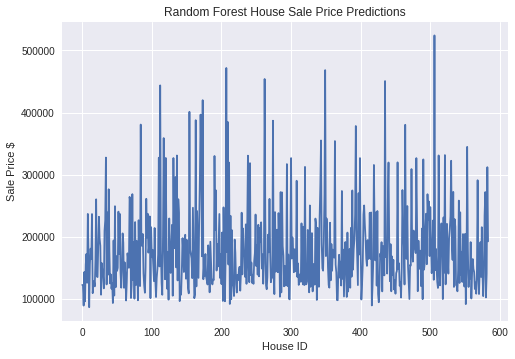

In [42]:
# Since random forest is our best performing regressor, we're going to tune it 
rf = RandomForestRegressor(n_estimators = 500, max_features = int(len(variables)*0.5), max_depth = 5, bootstrap=False)
print(rf)
rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_hat, y_test))) # our RMSE for the predictions of sale prices

plt.plot(y_hat)
plt.title("Random Forest House Sale Price Predictions")
plt.ylabel('Sale Price $')
plt.xlabel("House ID")
plt.show()